In [1]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [6]:
full_df = pd.read_csv("../data/final_cohort.csv")

In [ ]:
df = full_df.copy().drop(
    ['hadm_id', 'dod', 'seq_num', 'icd_code', 'icd_version', 'long_title', 
     'admittime', 'dischtime', 'discharge_location', 'edregtime', 'edouttime', 
     'stay_id', 'outtime','anchor_year', 'anchor_year_group', 'Hematocrit, Calculated',
     'RDW-SD', 'Basophils', 'Eosinophils', 'Monocytes', 'Lymphocytes', 'CK-MB Index', 
     'Oxygen'], 
    axis=1
    )

# Calculating survival time
df['intime'] = pd.to_datetime(df['intime'])
df['deathtime'] = pd.to_datetime(df['deathtime'])

df['survival_time'] = (df['deathtime'] - df['intime']).dt.total_seconds() / (60 * 60 * 24) # survival time is in days
df['90_day_mortality'] = (df['survival_time']<=90).astype(int)
df['30_day_mortality'] = (df['survival_time']<=30).astype(int)

# Keep only rows with SIRI
df = df[
    df["SIRI"].notna()
    & df["Absolute Neutrophil Count"].notna()
    & df["Absolute Monocyte Count"].notna()
    & df["Absolute Lymphocyte Count"].notna()
].copy()

In [ ]:
# Removing people who died in the first 24 hours
df_surv_time = df[(df['survival_time']>1) | (df['survival_time'].isna())]
sum(df['survival_time'] < 1)

55

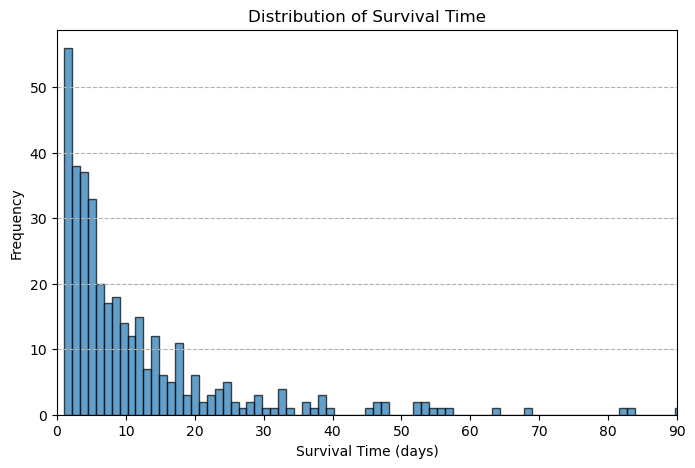

In [29]:
plt.figure(figsize=(8, 5))
plt.hist(df_surv_time['survival_time'], bins=2000, edgecolor='black', alpha=0.7)

plt.title('Distribution of Survival Time')
plt.xlim(0, 90)
plt.xlabel('Survival Time (days)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=1)
plt.show()

In [38]:
df90 = pd.read_csv('../data/90_day_mort.csv')
y = df90.copy()['target']
X = df90.copy().drop(['target'], axis = 1)
